In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_4580/181746618.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('properties.csv')

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_4580/1113565266.py:1: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('properties.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12685 entries, 0 to 12684
Columns: 145 entries, ID to Pantry Type
dtypes: float64(12), int64(93), object(40)
memory usage: 14.0+ MB


In [5]:
df.columns

Index(['ID', 'Possession Status', 'Availability Starts From', 'Floor No',
       'Commercial', 'Developer', 'Approved Authority Name', 'Units Available',
       'Price', 'Price (English)',
       ...
       'Rentable CommuniPfty Space', 'Retail Boulevard (Retail Shops)',
       'Cycling & Jogging Track', 'Fire Fighting Equipment',
       'Aesthetically designed landscape garden', 'Possession By', 'NRI Pref',
       'Land Area / Covered Area', 'Land Area Unit', 'Pantry Type'],
      dtype='object', length=145)

In [6]:
df.describe()

,ID,Units Available,Price,Maintenance Charges,Booking Amount,Covered Area,sqft Price,Carpet Area,Bathroom,bedroom,...,Meditation Area,Multipurpose Courts,Recreational Pool,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Land Area / Covered Area,Land Area Unit
count,12685.000000,6135.000000,1.260100e+04,6.283000e+03,7.701000e+03,11374.000000,1.148000e+04,10133.000000,12616.000000,12685.000000,...,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,84.000000,86.000000
mean,6343.000000,7.751589,2.640261e+07,9.076812e+03,8.101702e+05,1037.746439,2.243507e+04,819.201224,2.143389,1.987150,...,0.540402,0.540323,0.536539,0.536855,0.537958,0.540166,0.544028,0.536382,7248.869048,12847.825581
std,3661.988417,26.335448,3.653648e+08,2.399983e+05,2.997549e+06,727.327389,3.187654e+05,585.037811,0.926965,0.943404,...,0.498385,0.498391,0.498683,0.498660,0.498577,0.498404,0.498077,0.498694,18240.893916,10.643078
min,1.000000,0.000000,1.000000e+05,0.000000e+00,0.000000e+00,10.000000,0.000000e+00,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12800.000000
25%,3172.000000,0.000000,7.000000e+06,1.000000e+01,1.000000e+05,605.500000,1.000000e+04,468.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,792.500000,12850.000000
50%,6343.000000,1.000000,1.350000e+07,2.500000e+03,5.000000e+05,850.000000,1.634850e+04,671.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2000.000000,12850.000000
75%,9514.000000,5.000000,2.550000e+07,6.000000e+03,9.000000e+05,1200.000000,2.461500e+04,950.000000,2.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3392.500000,12850.000000
max,12685.000000,750.000000,4.080000e+10,1.768000e+07,1.050000e+08,15006.000000,3.400000e+07,20870.000000,10.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100000.000000,12853.000000


In [7]:
df = df.sort_values(by='Price')

In [8]:
class Plotter:
  def plot_price_categories_by_summary_table(ax, df, title):
    category_order = ['low', 'medium', 'high']
    colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}

    sns.barplot(data=df, x='Price Category', y='Count', palette=colors, order=category_order, ax=ax, width=0.3)
    # sns.countplot(data=df, x='Price Category', hue="Price Category", palette=colors, order=category_order, ax=ax)
    
    ax.set_title(title)
    ax.set_xlabel('Price Category')
    ax.set_ylabel('Count of Properties')
    # ax.set_ylim(0, max(df['Count']) + 5)
    
    # plt.ylim(0, max(subset['Count']) + 5)  # Adjust y-limit for better visualization
    plt.tight_layout()
  
  def plot_multi_bar_plot(ax, df, title, target_column):
    pivot_df = df.pivot(index=target_column, columns='Price Category', values='Count').fillna(0)

    pivot_df.plot(kind='bar', ax=ax)

    # Labels and title
    ax.set_xlabel('Cities')
    ax.set_ylabel('Count')
    ax.set_title(title)
    ax.legend(title='Price Category')


In [9]:
def get_summary_table(df, group_by_column):
  summary_table = df.groupby([group_by_column, 'Price Category']).agg({
      'Price': ['mean', 'std', 'min', 'max', 'count']
  }).reset_index()

  summary_table.columns = [group_by_column, 'Price Category', 'Mean', 'Std Dev', 'Min', 'Max', 'Count']

  category_order = ['low', 'medium', 'high']
  summary_table['Price Category'] = pd.Categorical(summary_table['Price Category'], categories=category_order, ordered=True)

  summary_table = summary_table.sort_values([group_by_column, 'Price Category']).reset_index(drop=True)
  
  unique_values_in_group_by_column = summary_table[group_by_column].unique()

  return summary_table, unique_values_in_group_by_column

# Task 1
```
As investors have diverse budget limits, split the overall opportunities into three different price ranges. Analyze the distribution of these price ranges across cities. (5 Marks)
```

In [10]:
low_threshold = df['Price'].quantile(0.33)
high_threshold = df['Price'].quantile(0.66)

def categorize_price(price):
    if price < low_threshold:
        return 'low'
    elif price < high_threshold:
        return 'medium'
    else:
        return 'high'
    
df['Price Category'] = df['Price'].apply(categorize_price)

summary_table = df.groupby('Price Category').agg({
    'Price': ['mean', 'std', 'min', 'max', 'count']
}).reset_index()

summary_table.columns = ['Price Category', 'Mean', 'Std Dev', 'Min', 'Max', 'Count']

category_order = ['low', 'medium', 'high']
summary_table['Price Category'] = pd.Categorical(summary_table['Price Category'], categories=category_order, ordered=True)
summary_table = summary_table.sort_values('Price Category').reset_index(drop=True)
print(tabulate(summary_table, headers='keys', tablefmt='pretty'))

+---+----------------+--------------------+--------------------+------------+---------------+-------+
|   | Price Category |        Mean        |      Std Dev       |    Min     |      Max      | Count |
+---+----------------+--------------------+--------------------+------------+---------------+-------+
| 0 |      low       | 5138200.357056695  | 2029363.1047203515 |  100000.0  |   8650000.0   | 4145  |
| 1 |     medium     | 13541293.728036486 | 3216797.692059702  | 8700000.0  |  19780000.0   | 4166  |
| 2 |      high      | 59437872.96969697  | 624868752.6113695  | 19800000.0 | 40800000001.0 | 4290  |
+---+----------------+--------------------+--------------------+------------+---------------+-------+


/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_4580/2334453845.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Price Category', y='Count', palette=colors, order=category_order, ax=ax, width=0.3)


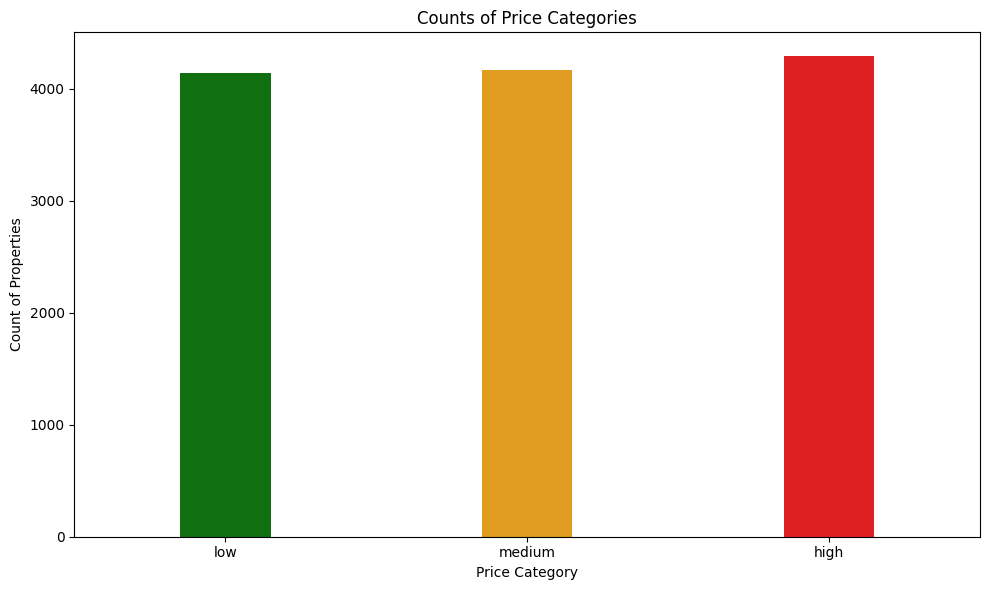

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
Plotter.plot_price_categories_by_summary_table(ax, summary_table, title='Counts of Price Categories')
plt.show()

+----+-----------+----------------+--------------------+--------------------+------------+---------------+-------+
|    |   City    | Price Category |        Mean        |      Std Dev       |    Min     |      Max      | Count |
+----+-----------+----------------+--------------------+--------------------+------------+---------------+-------+
| 0  | Agartala  |      low       |     5117000.0      |        nan         | 5117000.0  |   5117000.0   |   1   |
| 1  | Bhiwandi  |      low       |     2200000.0      |        0.0         | 2200000.0  |   2200000.0   |   2   |
| 2  |  Gurgaon  |      low       |     3500000.0      |        nan         | 3500000.0  |   3500000.0   |   1   |
| 3  | Hyderabad |      low       |     3968750.0      | 2441448.2674955744 | 1800000.0  |   8000000.0   |   8   |
| 4  |  Kalyan   |      low       | 4328571.428571428  | 1437549.1710016804 | 2200000.0  |   7000000.0   |   7   |
| 5  |  Kalyan   |     medium     |     9750000.0      | 353553.39059327374 | 95

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_4580/2334453845.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Price Category', y='Count', palette=colors, order=category_order, ax=ax, width=0.3)
/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_4580/2334453845.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Price Category', y='Count', palette=colors, order=category_order, ax=ax, width=0.3)
/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_4580/2334453845.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sa

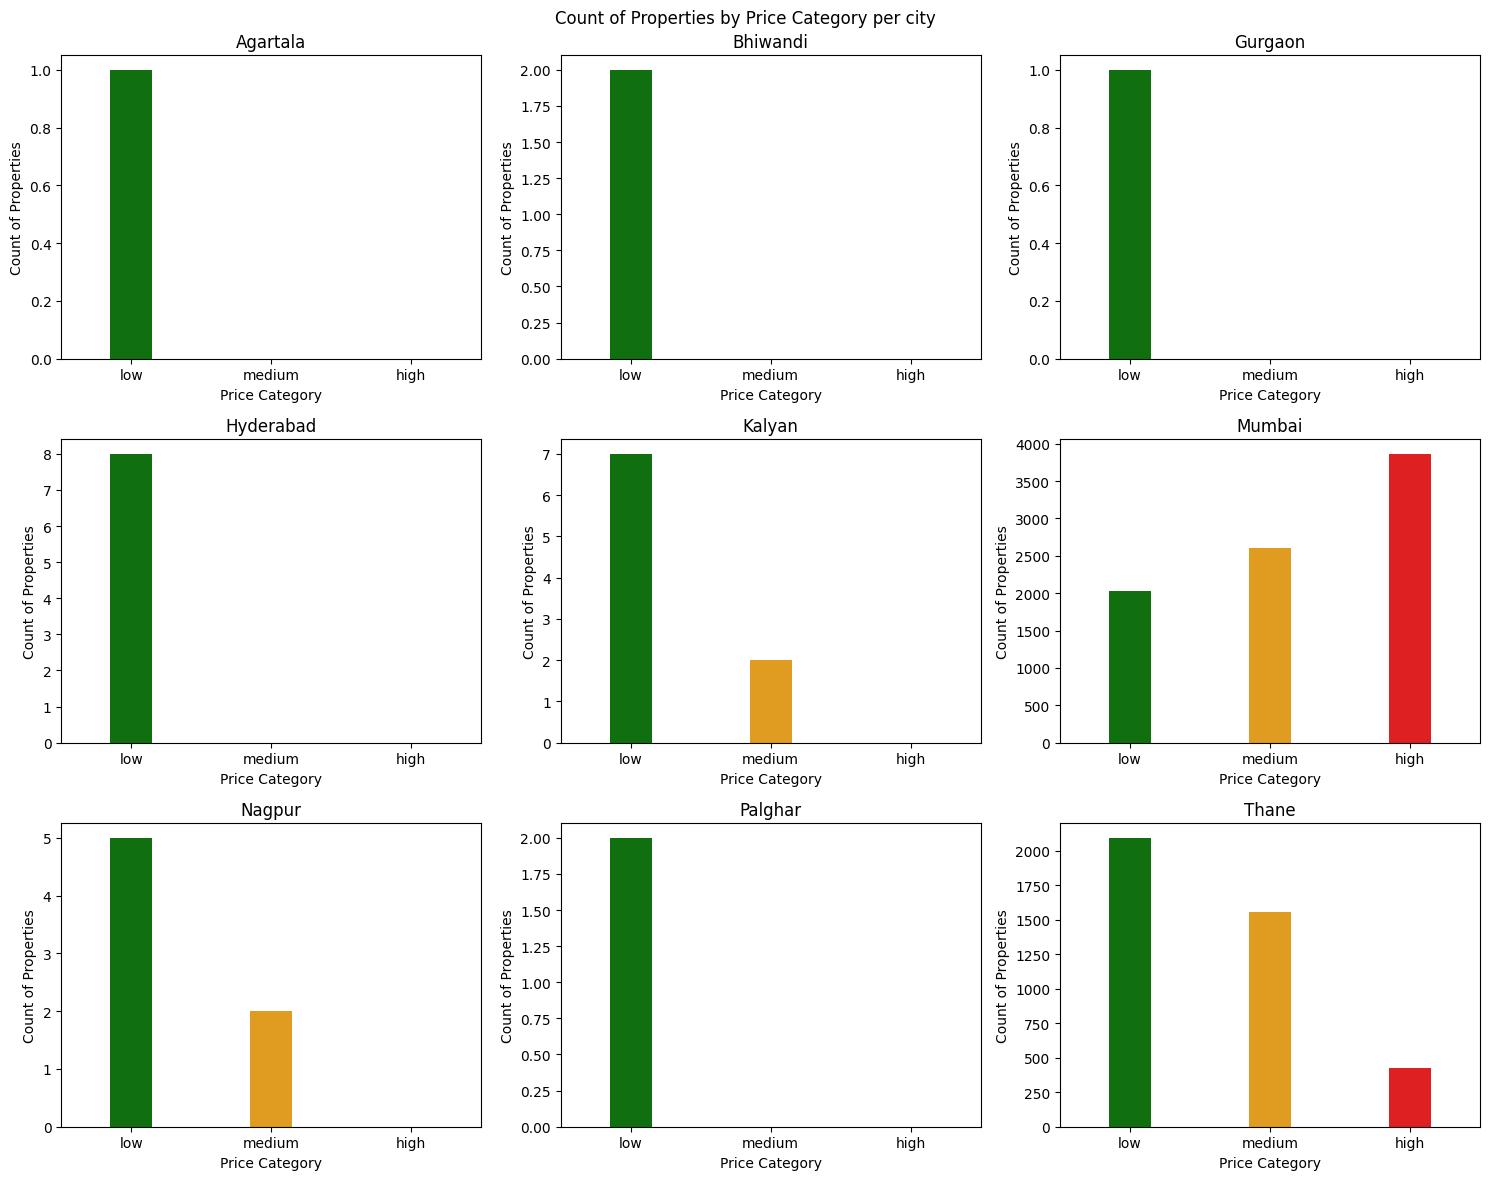

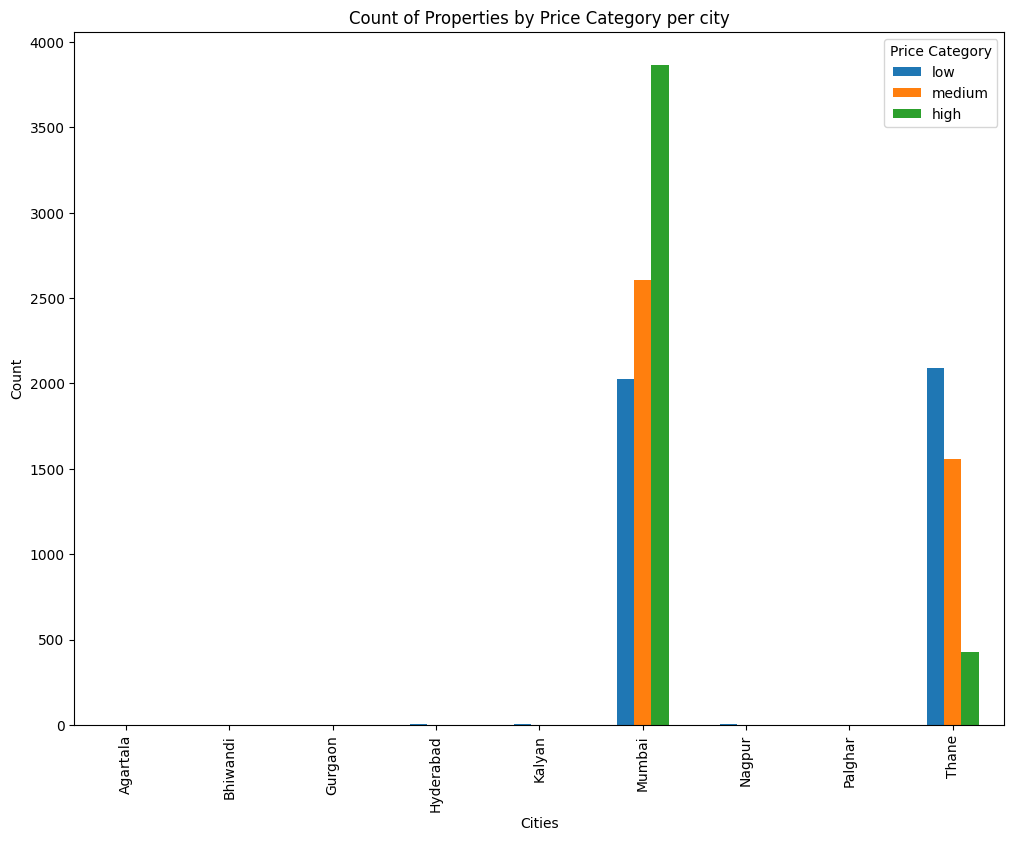

In [12]:
summary_table, cities = get_summary_table(df, group_by_column='City')

print(tabulate(summary_table, headers='keys', tablefmt='pretty'))


fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()
fig.suptitle('Count of Properties by Price Category per city')

for (ax, city) in zip(axes,cities):
    subset = summary_table[summary_table['City'] == city]
    Plotter.plot_price_categories_by_summary_table(ax, subset, title=f'{city}')

plt.show()

# Multibar plot
fig, ax = plt.subplots(figsize=(12, 9))
Plotter.plot_multi_bar_plot(ax, summary_table, title='Count of Properties by Price Category per city', target_column='City')
plt.show()


# Task 2
```
Provide investors with a high-level summary of the whole data using the price range dimensions. Consider factors like property type, city, and key amenities. What method/tool would you use to present this information effectively? (5 Marks)
```

+----+-------------------------+----------------+--------------------+--------------------+------------+---------------+-------+
|    |    Type of Property     | Price Category |        Mean        |      Std Dev       |    Min     |      Max      | Count |
+----+-------------------------+----------------+--------------------+--------------------+------------+---------------+-------+
| 0  |        Apartment        |      low       | 5225172.234836703  | 1997197.0418378331 |  100000.0  |   8650000.0   | 3858  |
| 1  |        Apartment        |     medium     | 13545404.98351378  | 3220140.499211435  | 8700000.0  |  19780000.0   | 4064  |
| 2  |        Apartment        |      high      | 59245486.03669502  | 637909146.1415206  | 19800000.0 | 40800000001.0 | 4115  |
| 3  | Builder Floor Apartment |      low       | 4044137.917241379  | 1923022.3207123384 | 1100000.0  |   8500000.0   |  145  |
| 4  | Builder Floor Apartment |     medium     | 12778947.368421054 |  2593042.4470668   | 90000

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_4580/2334453845.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Price Category', y='Count', palette=colors, order=category_order, ax=ax, width=0.3)
/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_4580/2334453845.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Price Category', y='Count', palette=colors, order=category_order, ax=ax, width=0.3)
/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_4580/2334453845.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sa

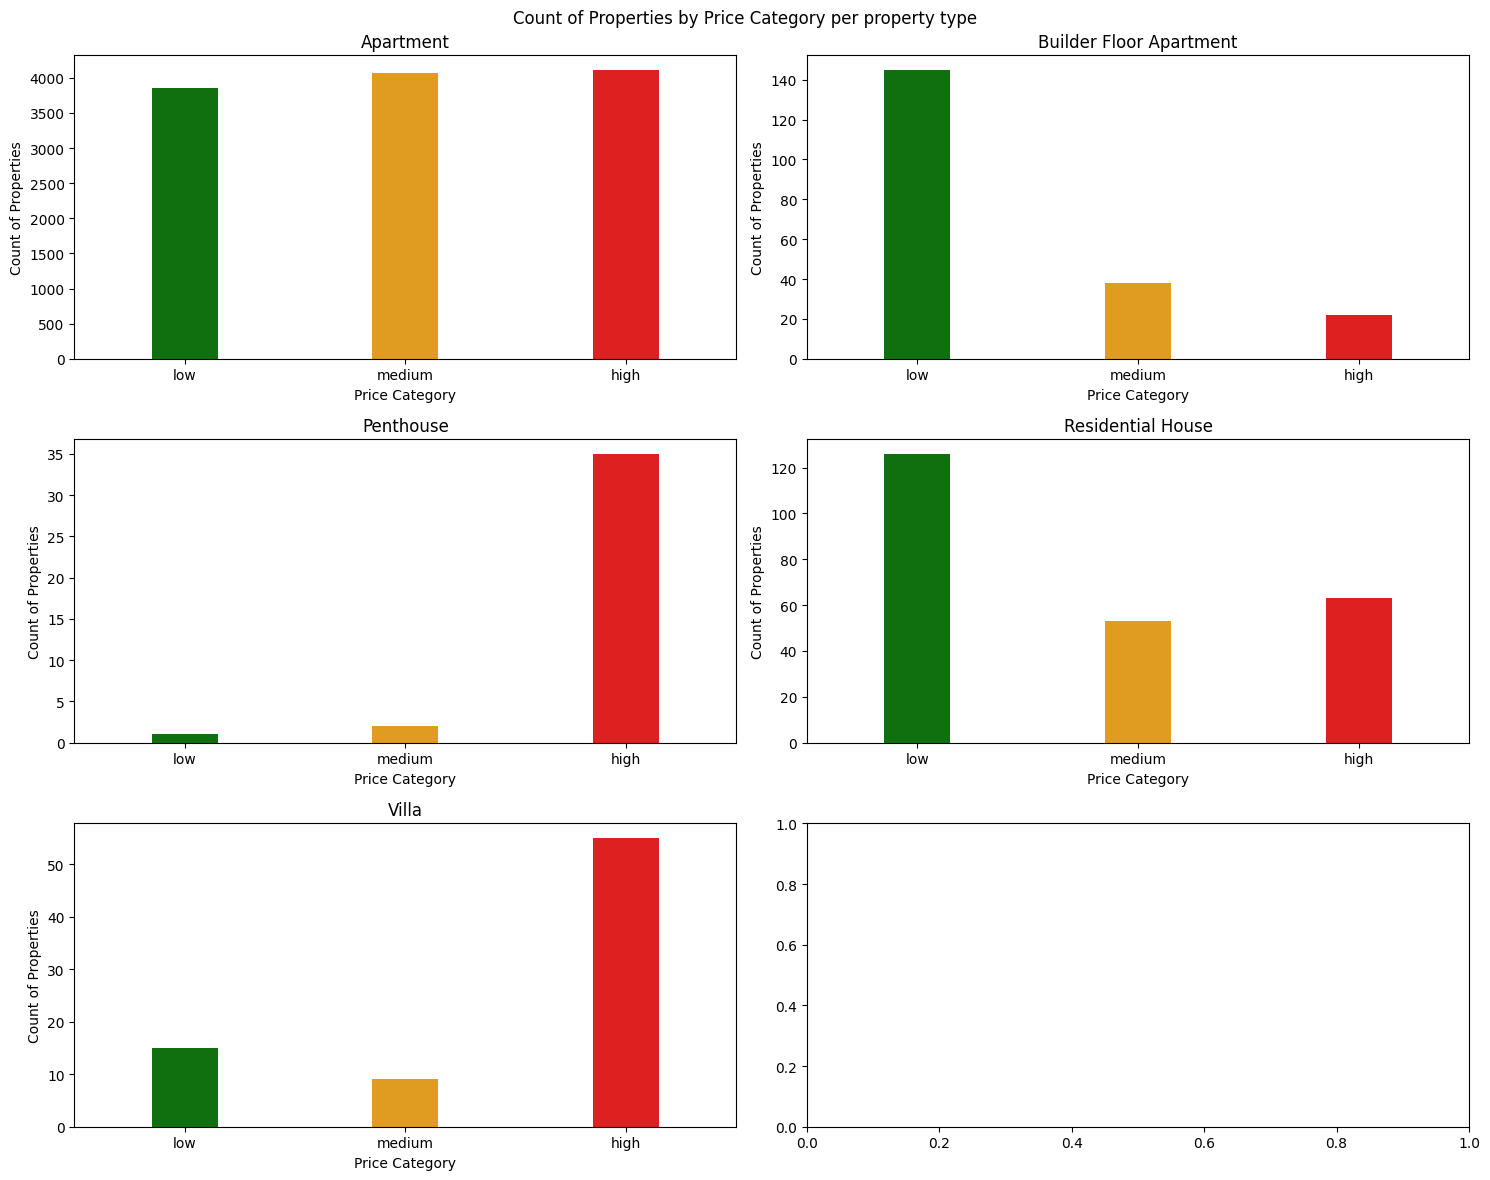

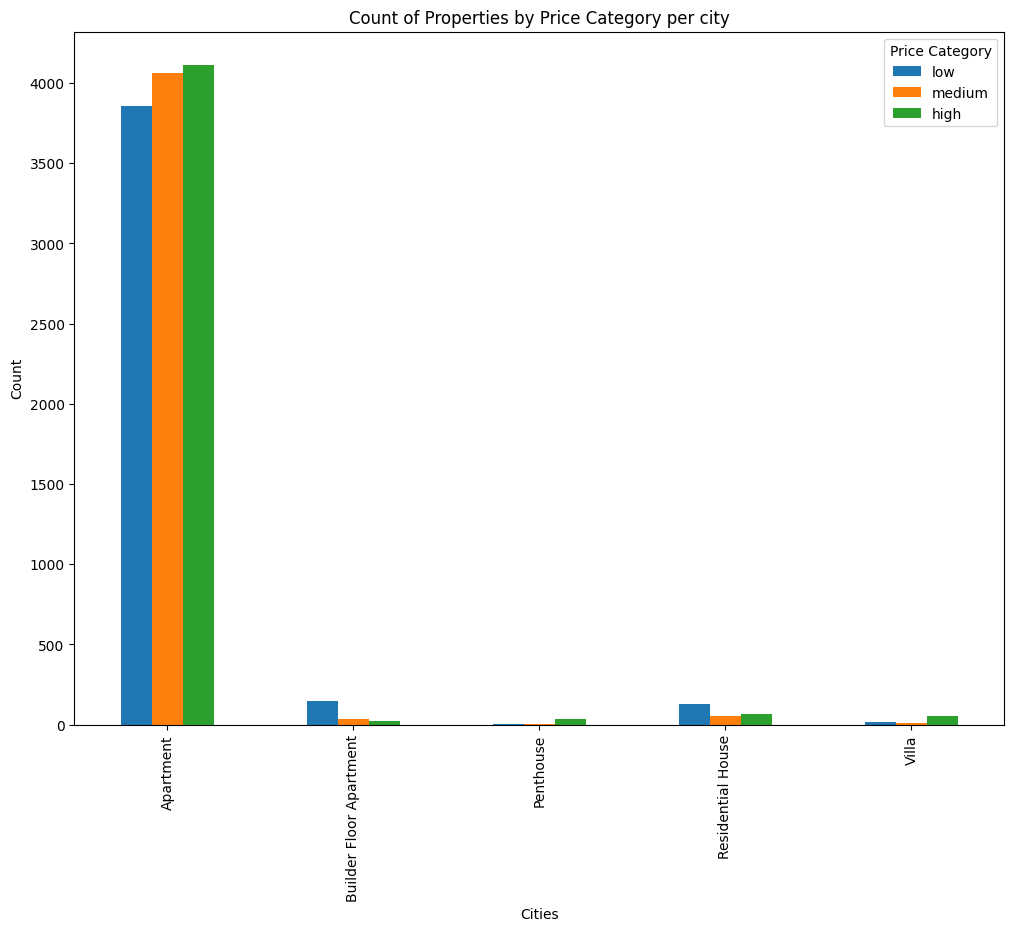

In [13]:
summary_table, property_types = get_summary_table(df,group_by_column='Type of Property')

print(tabulate(summary_table, headers='keys', tablefmt='pretty'))
    
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()
fig.suptitle('Count of Properties by Price Category per property type')

for (ax, property_type) in zip(axes,property_types):
    subset = summary_table[summary_table['Type of Property'] == property_type]
    Plotter.plot_price_categories_by_summary_table(ax, subset, title=f'{property_type}')

plt.show()

# Multibar plot
fig, ax = plt.subplots(figsize=(12, 9))
Plotter.plot_multi_bar_plot(ax, summary_table, title='Count of Properties by Price Category per city', target_column='Type of Property')
plt.show()

+----+-----------+----------------+--------------------+--------------------+------------+---------------+-------+
|    |   City    | Price Category |        Mean        |      Std Dev       |    Min     |      Max      | Count |
+----+-----------+----------------+--------------------+--------------------+------------+---------------+-------+
| 0  | Agartala  |      low       |     5117000.0      |        nan         | 5117000.0  |   5117000.0   |   1   |
| 1  | Bhiwandi  |      low       |     2200000.0      |        0.0         | 2200000.0  |   2200000.0   |   2   |
| 2  |  Gurgaon  |      low       |     3500000.0      |        nan         | 3500000.0  |   3500000.0   |   1   |
| 3  | Hyderabad |      low       |     3968750.0      | 2441448.2674955744 | 1800000.0  |   8000000.0   |   8   |
| 4  |  Kalyan   |      low       | 4328571.428571428  | 1437549.1710016804 | 2200000.0  |   7000000.0   |   7   |
| 5  |  Kalyan   |     medium     |     9750000.0      | 353553.39059327374 | 95

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_4580/2334453845.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Price Category', y='Count', palette=colors, order=category_order, ax=ax, width=0.3)
/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_4580/2334453845.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Price Category', y='Count', palette=colors, order=category_order, ax=ax, width=0.3)
/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_4580/2334453845.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sa

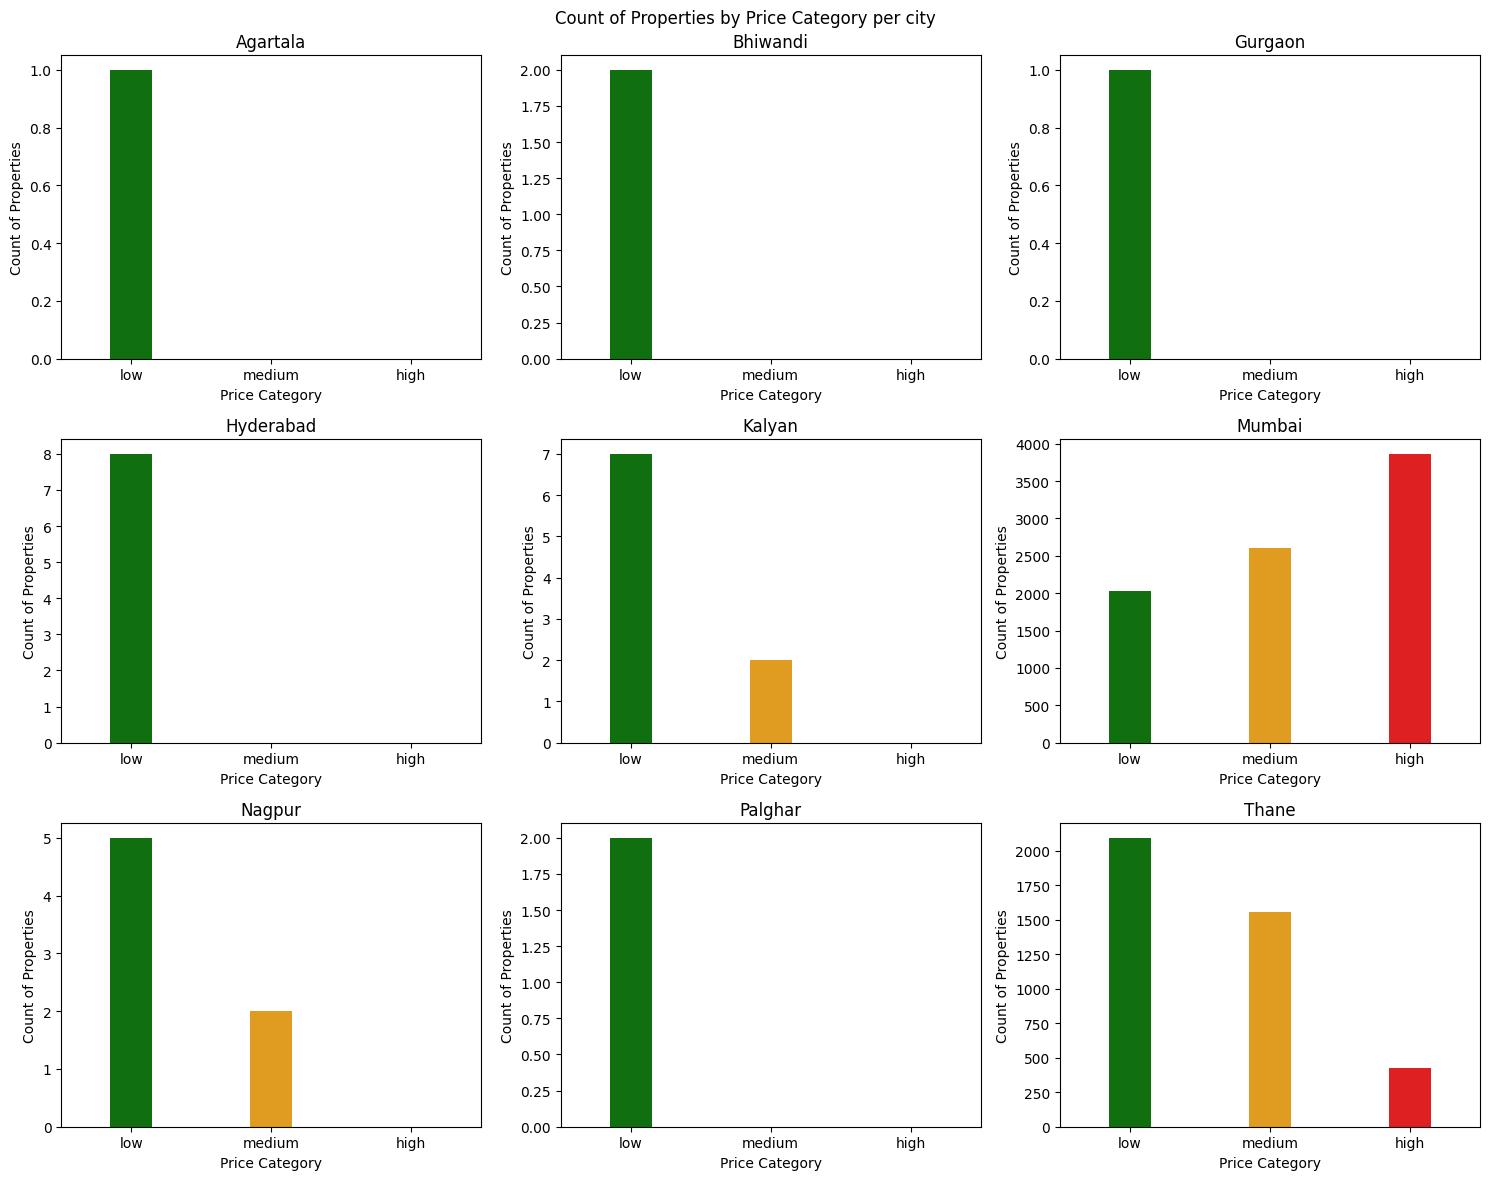

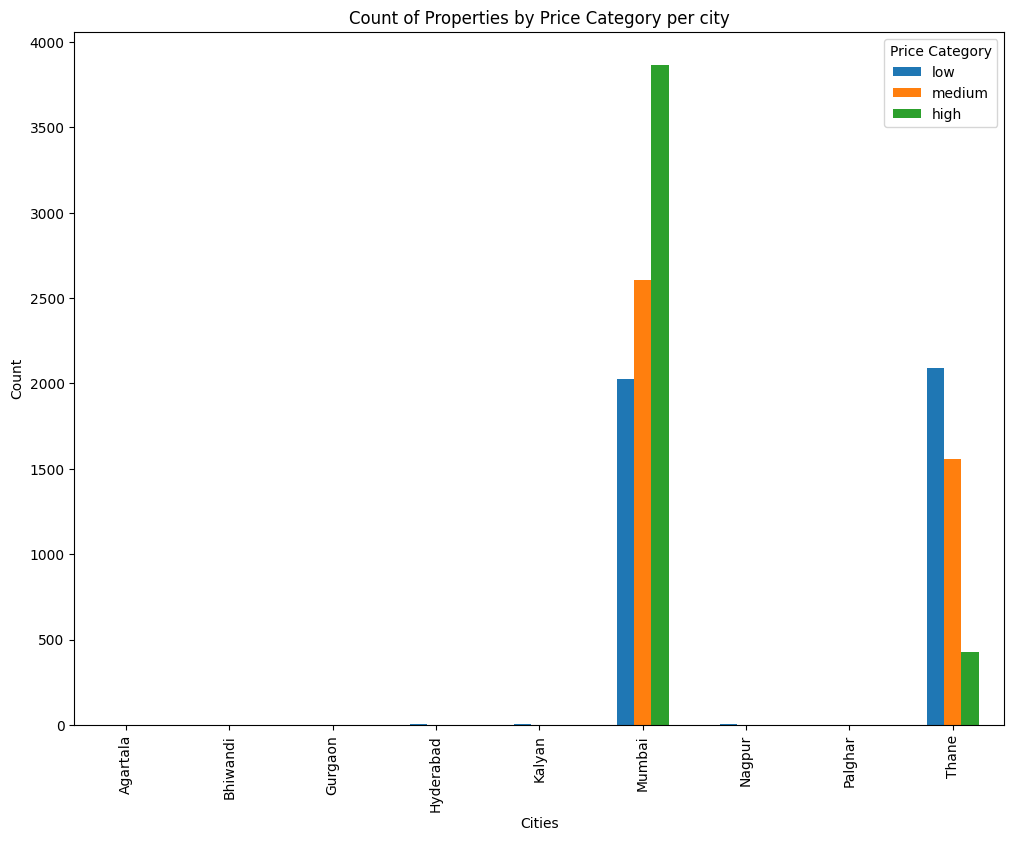

In [14]:
summary_table, cities = get_summary_table(df, group_by_column='City')

print(tabulate(summary_table, headers='keys', tablefmt='pretty'))


fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()
fig.suptitle('Count of Properties by Price Category per city')

for (ax, city) in zip(axes,cities):
    subset = summary_table[summary_table['City'] == city]
    Plotter.plot_price_categories_by_summary_table(ax, subset, title=f'{city}')

plt.show()

# Multibar plot
fig, ax = plt.subplots(figsize=(12, 9))
Plotter.plot_multi_bar_plot(ax, summary_table, title='Count of Properties by Price Category per city', target_column='City')
plt.show()

# Task 4
```
Certain investors seek to compare investment opportunities in less expensive and more expensive
localities within each city. For instance, compare the average Carpet Area of high-budget properties
in prime locations (isPrimeLocationProperty) versus non-prime locations.
```

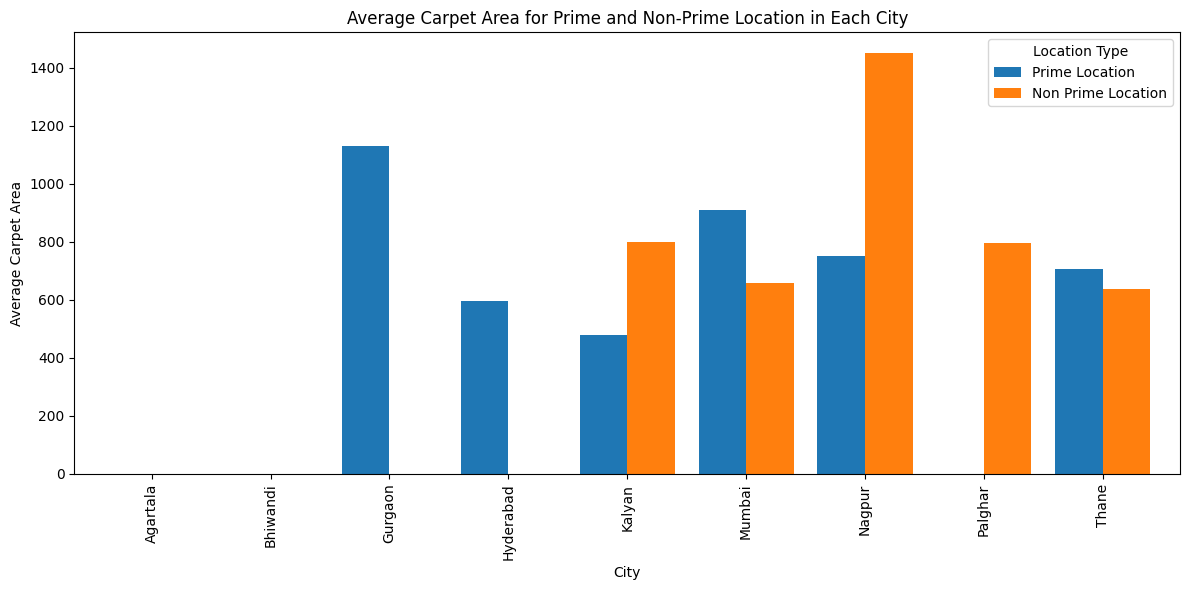

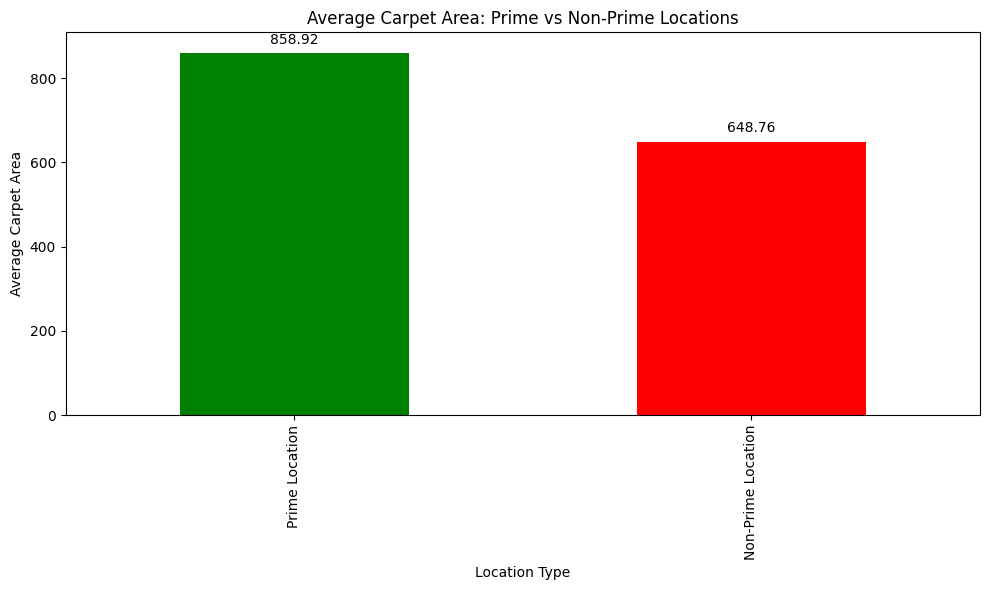

In [23]:
prime_location_df = df[df['isPrimeLocationProperty'] == 'Y']
non_prime_location_df = df[df['isPrimeLocationProperty'] == 'N']

# plot for average price comparison in each city
fig, ax = plt.subplots(figsize=(12, 6))
prime_location_carpet_area = prime_location_df.groupby('City')['Carpet Area'].mean()
non_prime_location_carpet_area = non_prime_location_df.groupby('City')['Carpet Area'].mean()
combined_df = pd.DataFrame({
            'Prime Location': prime_location_carpet_area,
            'Non Prime Location': non_prime_location_carpet_area
        }).reset_index()

combined_df.plot(kind='bar', x='City', ax=ax, width=0.8)
ax.set_title('Average Carpet Area for Prime and Non-Prime Location in Each City')
ax.set_xlabel('City')
ax.set_ylabel('Average Carpet Area')
ax.legend(title='Location Type')
plt.tight_layout()
plt.show()


prime_location_avg = prime_location_df['Carpet Area'].mean()
non_prime_location_avg = non_prime_location_df['Carpet Area'].mean()

comparison_df = pd.DataFrame({
    'Location Type': ['Prime Location', 'Non-Prime Location'],
    'Average Carpet Area': [prime_location_avg, non_prime_location_avg]
})

# Plot for average carpet area comparision across all cities
plt.figure(figsize=(10, 6))
ax = plt.gca()
comparison_df.plot(kind='bar', x='Location Type', y='Average Carpet Area', ax=ax, color=['green', 'red'], legend=False)
ax.set_title('Average Carpet Area: Prime vs Non-Prime Locations')
ax.set_xlabel('Location Type')
ax.set_ylabel('Average Carpet Area')
ax.set_ylim(0, max(comparison_df['Average Carpet Area']) + 50)  # Adjust y-limit for better visualization
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

# Task 5
```
Some investors prefer larger area properties with relatively lower budgets. Identify and visualize properties that offer the best value in terms of Carpet Area per unit of Price across different cities
```

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_4580/1187149305.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_value_properties, x='City', y='Value for Money', palette='viridis')


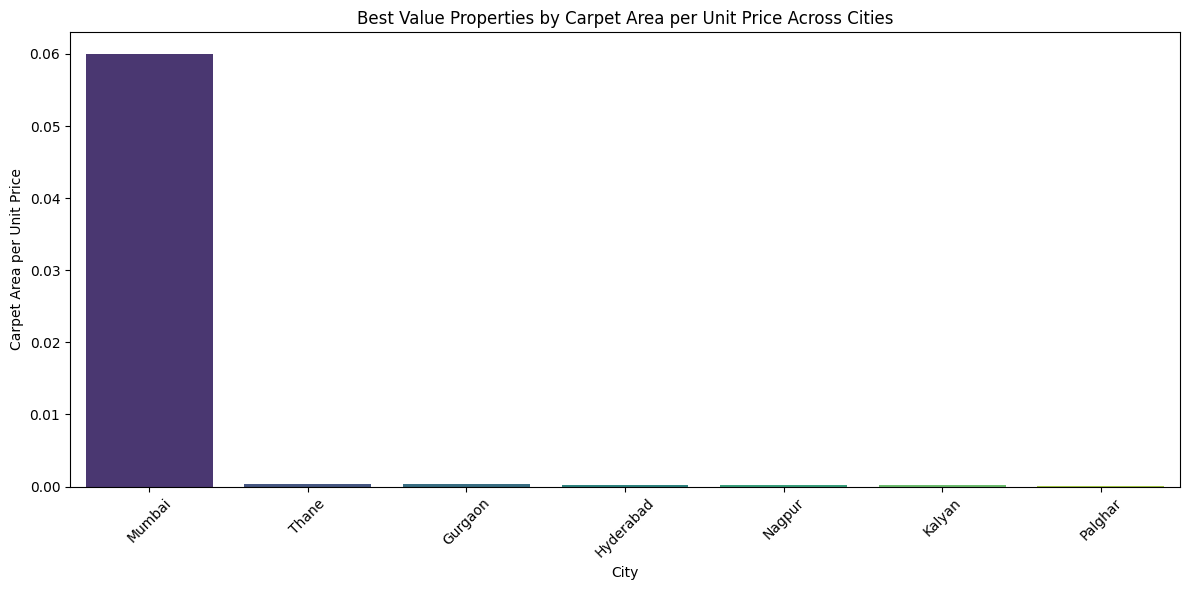

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_4580/1187149305.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_value_for_money, x='City', y='Value for Money', palette='viridis')


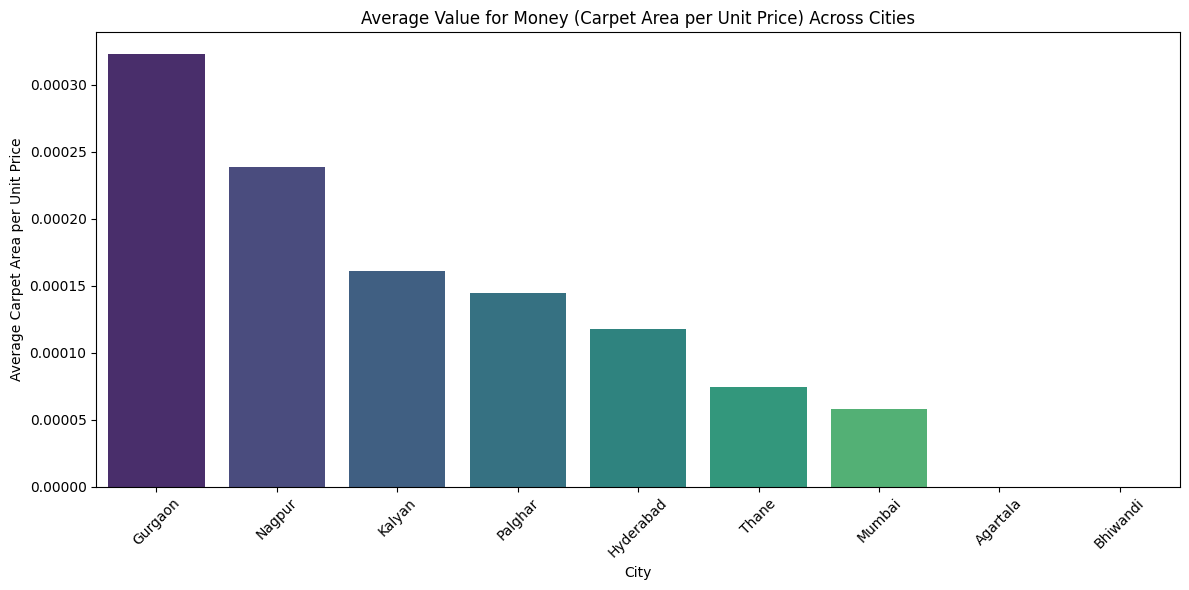

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Value for Money'] = df['Carpet Area'] / df['Price']
best_value_properties = df.loc[df.groupby('City')['Value for Money'].idxmax()]
best_value_properties = best_value_properties.sort_values(by='Value for Money', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=best_value_properties, x='City', y='Value for Money', palette='viridis')
plt.title('Best Value Properties by Carpet Area per Unit Price Across Cities')
plt.xlabel('City')
plt.ylabel('Carpet Area per Unit Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


avg_value_for_money = df.groupby('City')['Value for Money'].mean().reset_index()
avg_value_for_money = avg_value_for_money.sort_values(by='Value for Money', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_value_for_money, x='City', y='Value for Money', palette='viridis')
plt.title('Average Value for Money (Carpet Area per Unit Price) Across Cities')
plt.xlabel('City')
plt.ylabel('Average Carpet Area per Unit Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Task 6
```
Some investors are interested in knowing the hotspots for their offices in Mumbai and Thane. Analyze commercial properties in these cities, considering factors like Price, Carpet Area, Amenities, and Location
```